In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
path = "https://raw.githubusercontent.com/rohitgupta29/Datasets/master/clustering/data_kgp.csv"

df = pd.read_csv(path, index_col = 0)
df.head()

,x,y,cluster
0,-8.482852,-5.603349,2
1,-7.751632,-8.405334,2
2,-10.967098,-9.032782,2
3,-11.999447,-7.606734,2
4,-1.736810,10.478015,1


## Working with K-means Clustering

In [8]:
df['cluster'].value_counts()

1    67
0    67
2    66
Name: cluster, dtype: int64

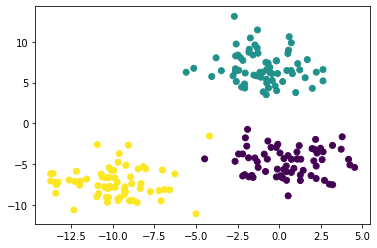

In [9]:
plt.scatter(df['x'],df['y'], c = df['cluster'], cmap = 'viridis' )

In [10]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [15]:
X = df[['x','y']]
y = df['cluster']

In [16]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [19]:
df[['x','y']] = X

In [34]:
kmeans = KMeans(n_clusters = 3 , random_state = 42)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [35]:
kmeans.labels_

array([1, 1, 1, 1, 2, 2, 0, 1, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 1, 0, 2, 0,
       0, 1, 1, 2, 2, 0, 1, 0, 2, 1, 1, 2, 1, 0, 0, 2, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 1, 2, 2, 0, 2, 0, 0, 0, 2,
       1, 1, 1, 0, 1, 2, 1, 1, 0, 1, 1, 1, 0, 1, 2, 0, 2, 2, 0, 0, 0, 1,
       2, 0, 0, 1, 1, 0, 2, 2, 1, 1, 0, 0, 2, 2, 2, 0, 0, 1, 2, 2, 0, 0,
       0, 1, 0, 2, 2, 2, 2, 1, 0, 1, 2, 0, 2, 0, 2, 2, 2, 0, 0, 0, 1, 0,
       2, 2, 0, 0, 2, 0, 0, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 0, 1, 2, 0, 2,
       2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 0, 0, 2, 1, 2, 1, 2, 0, 2, 0, 1, 2,
       2, 1, 1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 2, 0, 0, 0, 2, 1, 0, 2,
       2, 1])

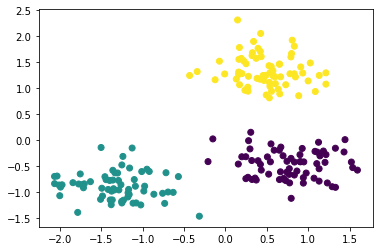

In [36]:
plt.scatter(df['x'],df['y'], c = kmeans.labels_, cmap = 'viridis' )

In [37]:
kmeans.labels_

array([1, 1, 1, 1, 2, 2, 0, 1, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 1, 0, 2, 0,
       0, 1, 1, 2, 2, 0, 1, 0, 2, 1, 1, 2, 1, 0, 0, 2, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 1, 2, 2, 0, 2, 0, 0, 0, 2,
       1, 1, 1, 0, 1, 2, 1, 1, 0, 1, 1, 1, 0, 1, 2, 0, 2, 2, 0, 0, 0, 1,
       2, 0, 0, 1, 1, 0, 2, 2, 1, 1, 0, 0, 2, 2, 2, 0, 0, 1, 2, 2, 0, 0,
       0, 1, 0, 2, 2, 2, 2, 1, 0, 1, 2, 0, 2, 0, 2, 2, 2, 0, 0, 0, 1, 0,
       2, 2, 0, 0, 2, 0, 0, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 0, 1, 2, 0, 2,
       2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 0, 0, 2, 1, 2, 1, 2, 0, 2, 0, 1, 2,
       2, 1, 1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 2, 0, 0, 0, 2, 1, 0, 2,
       2, 1])

In [39]:
SSE = []

index = range(1,10)
for i in index:
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)
    print(i, kmeans.inertia_)

1 400.0000000000001
2 156.41078579574986
3 44.05704845329278
4 36.72638711866608
5 31.016427615314644
6 25.39959047192452
7 22.547184727743293
8 19.923438178477447
9 17.295836404824975


Text(0, 0.5, 'SSE')

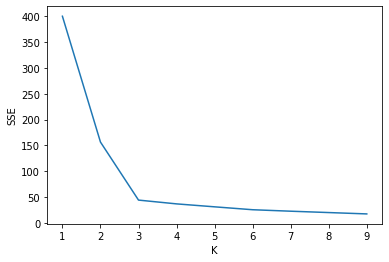

In [40]:
plt.plot(index, SSE)
plt.xlabel('K')
plt.ylabel('SSE')

# Testing with Iris Dataset

In [42]:
from sklearn import datasets

iris = datasets.load_iris()

In [45]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [43]:
X = iris.data

In [44]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [46]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [47]:
SSE = []

index = range(1,10)
for i in index:
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)
    print(i, kmeans.inertia_)

1 600.0
2 222.36170496502308
3 139.82049635974982
4 114.41256181896094
5 90.92751382392052
6 80.02249599557439
7 71.8162459810614
8 62.28749580350201
9 54.81105203150129


Text(0, 0.5, 'SSE')

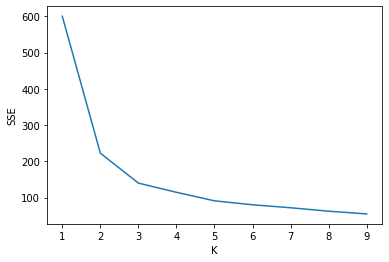

In [48]:
plt.plot(index, SSE)
plt.xlabel('K')
plt.ylabel('SSE')